<a href="https://colab.research.google.com/github/linjiw/787/blob/main/q2___3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# %cd /content/drive/MyDrive/24787/hw3/data_and_code

[WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/24787/hw3/data_and_code'
e:\drive\24787\hw3\data_and_code


### Note for question1
- Please follow the template to complete q1
- You may create new cells to report your results and observations

In [ ]:
# Import libraries
# load packages
import numpy as np
import pandas as pd
import time
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


## A. Load data and plot
### TODO
- load data
- plot the points of different labels with different color

###Q2 (a)

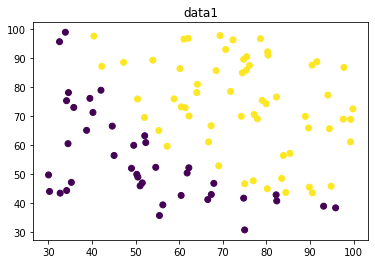

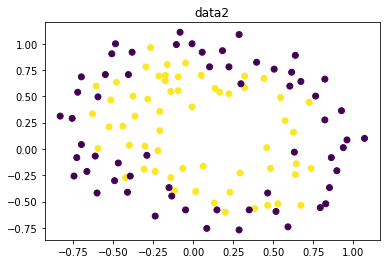

In [ ]:
# Load dataset


data1 = np.loadtxt("ex2data1.txt",delimiter=',')
data2 = np.loadtxt("ex2data2.txt",delimiter=',')

def readdata(filename):
    data = np.loadtxt(filename,delimiter=',')
    X = data[:,:-1]
    Y = data[:,-1].reshape(-1,1)
    return X,Y
def plotscatter(X,Y,title=None):
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.title(title)
    plt.show()
    # return fig
    

X1,Y1 = readdata("ex2data1.txt")
X2,Y2 = readdata("ex2data2.txt")

plotscatter(X1,Y1,title="data1")
plotscatter(X2,Y2,title="data2")

# print(Y1.shape)
# X1 = data1[:,:-1]
# Y1 = data1[:,-1]
# X2 = data2[:,:-1]
# Y2 = data2[:,-1]
# print(X1.shape)



# fig =plt.figure()
# plt.scatter(X1[:,0],X1[:,1],c=Y1)
# fig =plt.figure()
# plt.scatter(X2[:,0],X2[:,1],c=Y2)
# Y1_reshape = Y1.reshape(-1,1)





# Plot points


## B. sigmoid function
### TODO
- name the sigmoid function **sigmoid()**

###Q2 (b)

In [ ]:
#Define sigmoid function

def sigmoid(mat):
    return (1+np.exp(-mat))**(-1)

## C. loss function, gradient function
### TODO

- Define loss function and name it **loss()**
- Define Gradient Function and name it **gradient()**

###Q2 (c)

In [ ]:
#Define loss function
def loss(X,w,Y,e):
    return np.mean(-Y*np.log(sigmoid(X @ w)+e)-(1-Y)*np.log(1-sigmoid(X @ w)+e))

#Define gradient function
def gradient(X,w,Y):
    return np.mean((sigmoid(X @ w)-Y)*X,axis= 0).reshape(-1,1)

## D. prediction function, gradient descent and plot meshgrids

### TODO

- Define a prediction function and name it **predict()**
- Using all above functions implement gradient descent with appropriate initialization, learning rates & # of initialization
- Use contourf/meshgrids or any other command to visualize the boundary conditions

###Q2 (d)

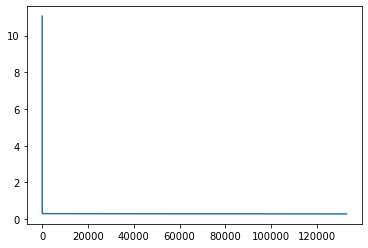

In [ ]:
#Define prediction function
def predict(w,X):
    # print(f"{w.shape} {X.shape}")
    vector = X@w
    p = sigmoid(vector)
    pred = np.empty(vector.shape)

    pred[p>0.5] =1
    pred[p<=0.5] = 0
  
    return np.hstack((p, pred))
def plotloss(losslst):
    plt.plot(np.arange(len(losslst)), losslst)
    plt.show()

def train(X,Y,step=0.1,iter=1e6,threshold=1e-8,e=1e-8):
    new_X = np.ones((X.shape[0],X.shape[1]+1))
    new_X[:,1:] = X
    error  = 1e5
    count = 0
    prev = 0
    J_lst = []
    w = np.array([[-65],[0],[0]],dtype=float)
    while error > threshold and count<iter:
        J = loss(new_X,w,Y1,e)
        G = gradient(new_X,w,Y1)
        w -= step*G
        error = np.abs(J-prev)
        prev = J
        J_lst.append(J)
        count+=1
    plotloss(J_lst)
    
    return w





w = train(X1,Y1,step=0.01,iter=1e6,threshold=1e-8,e=1e-8)






###Q2 (d)

predict results:
 [[2.73278232e-14 0.00000000e+00]
 [3.86740529e-14 0.00000000e+00]
 [5.47311199e-14 0.00000000e+00]
 ...
 [1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00]]


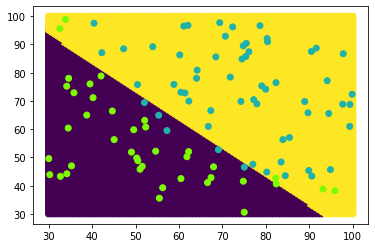

In [ ]:
def drawmesh(xrange,yrange,w,X,Y):
    xx = np.linspace(xrange[0], xrange[1], 100)
    yy = np.linspace(yrange[0], yrange[1], 100)
    xv, yv = np.meshgrid(xx, yy)
    xr= xv.ravel()
    yr = yv.ravel()
    new_X = np.ones((len(xr),3))
    new_X[:,1] = xr
    new_X[:,2] = yr
    soft = predict(w,new_X)
    # ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen"])
    print(f"predict results:\n {soft}")
    plt.scatter(xr,yr,c=soft[:,1])
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=ListedColormap([ "lawngreen", "lightseagreen"]))
    plt.show()


drawmesh([30,100],[30,100],w,X1,Y1)


## E. Feature mapping, regularized Cost function, gradient function and gradient descent
### TODO
- implement function **map_feature()** to transform data from original space to the 28D space specified in the write-up
- Create a regularized loss function & gradient function and name it **loss_reg()** and **gradient_reg()**
- Using both these functions implement gradient descent with appropriate initialization, learning rates & # of initialization
- Use contourf/meshgrids or any other command to visualize the boundary conditions

###Q3 (a)

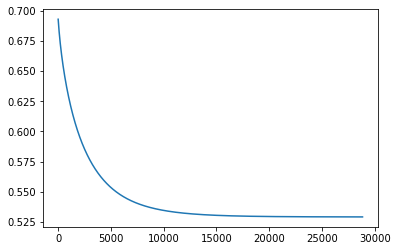

In [ ]:
# Transform points to 28D space
# Y2_reshape = Y2.reshape(-1,1)
def map_feature_reg(X,feature_num=6):
  x1 = X[:,0].reshape(-1,1)
  x2 = X[:,1].reshape(-1,1)
  count = 0
  for j in range(feature_num+1):
    for k in range(j+1):
      if count ==0:
        feature_lst = (x1**(k))*(x2**(j-k))
      else:
        feature_lst= np.hstack((feature_lst,(x1**(k))*(x2**(j-k))))
      count +=1

  return feature_lst


def loss_reg(X,Y,w,lamda, n,e):
    # just for the last part w, it will not take the bias term 
    w_partial = w.copy()
    w_partial[0,0] = 0

    return (np.mean(-Y*np.log(sigmoid(X @ w)+e)-(1-Y)*np.log(1-sigmoid(X @ w)+e))+lamda/(2*n)*(w_partial.T @ w_partial))[0][0]

def gradient_reg(X, Y, w,lamda,n,e):
   
    w_partial = w.copy()
    w_partial[0,0] = 0
    g = np.mean((sigmoid(X @ w)-Y)*X, axis= 0).reshape((-1,1))+lamda * w_partial/n
    return g

def train_reg(X,Y,step=0.1,iter=1e6,threshold=1e-8,e=1e-8,lamda=1,loss_plot=True):
      new_X = map_feature_reg(X,6)
      error  = 1e5
      count = 0
      prev = 0
      J_lst = []
      w = np.zeros((28,1))
      n = new_X.shape[0]
      # print(n)
      while error > threshold and count<iter:
        J = loss_reg(new_X,Y,w,lamda,n,e)
        G = gradient_reg(new_X,Y,w,lamda,n,e)
        w -= step*G
        error = np.abs(J-prev)
        prev = J
        J_lst.append(J)
        count+=1
      if loss_plot:
        plotloss(J_lst)
      return w

w = train_reg(X2,Y2,step=0.01,iter=1e6,threshold=1e-8,e=1e-8,lamda=1)



Here I define some functions to draw the boundry in both my method and sklearn.

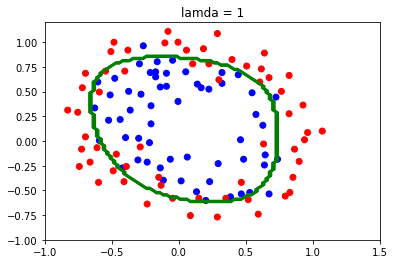

In [ ]:
def drawmesh_reg(xrange,yrange,w,X,Y,title=None,subplot=None):
    xx = np.linspace(xrange[0], xrange[1], 100)
    yy = np.linspace(yrange[0], yrange[1], 100)
    xv, yv = np.meshgrid(xx, yy)
    xr= xv.ravel()
    yr = yv.ravel()
    
    xc = xr.reshape(-1,1)
    yc = yr.reshape(-1,1)
    fake_x = np.hstack((xc,yc))
    
    new_X = map_feature_reg(fake_x)
    # print(new_X.shape)
    soft = predict(w,new_X)
    # ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen"])
    if subplot==None:
        plt.contour(xv,yv,soft[:,1].reshape((-1,100)),colors ='green')
        # plt.scatter(xr,yr,c=soft[:,1])
        plt.scatter(X[:,0],X[:,1],c=Y,cmap=ListedColormap([ "red", "blue"]))
        plt.title(title)
        plt.show()
    else:
        subplot.contour(xv,yv,soft[:,1].reshape((-1,100)),colors ='green')
        # subplot.scatter(xr,yr,c=soft[:,1])
        subplot.scatter(X[:,0],X[:,1],c=Y,cmap=ListedColormap([ "red", "blue"]))
        subplot.set_title(title)

# fig, axs = plt.subplots(1,2,figsize=(16,8))

drawmesh_reg([-1,1.5],[-1,1.2],w,X2,Y2,title="lamda = 1",subplot=None)


D:\anaconda\envs\piptorch\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


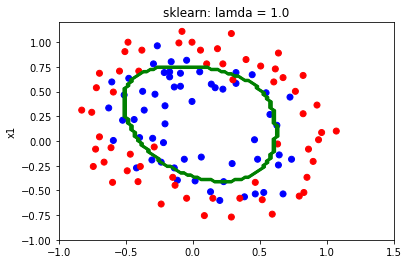

In [ ]:
from sklearn import linear_model 

def sk_mesh(xrange,yrange,X,Y,c=1,title=None,subplot=None):
    
    
    
    xx = np.linspace(xrange[0], xrange[1], 100)
    yy = np.linspace(yrange[0], yrange[1], 100)
    xv, yv = np.meshgrid(xx, yy)
    # print(xv.shape)

    xr= xv.ravel()
    yr = yv.ravel()
    
    xc = xr.reshape(-1,1)
    yc = yr.reshape(-1,1)
    
    fake_x = np.hstack((xc,yc))
    fake_X = map_feature_reg(fake_x)
    
    new_X = map_feature_reg(X)
    # print(f"{new_X.shape}  {Y2.shape}")
    clf = linear_model.LogisticRegression(penalty="l2", solver="liblinear",tol=1e-6,max_iter=int(1e6))
    clf.set_params(C=c)
    clf.fit(new_X,Y2)
    w = clf.coef_.reshape(-1,1)
    soft = predict(w,fake_X)
    # print(soft.shape)
    
    # ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen"])
    if subplot==None:
        plt.contour(xv,yv,soft[:,1].reshape((-1,100)),colors ='green')
        # plt.scatter(xr,yr,c=soft[:,1])
        plt.scatter(X[:,0],X[:,1],c=Y,cmap=ListedColormap([ "red", "blue"]))
        plt.title(f"sklearn: lamda = {c**(-1)}")
        plt.ylabel("x2")
        plt.ylabel("x1")
        plt.show()
    else:
        subplot.contour(xv,yv,soft[:,1].reshape((-1,100)),colors ='green')
        # subplot.scatter(xr,yr,c=soft[:,1])
        subplot.scatter(X[:,0],X[:,1],c=Y,cmap=ListedColormap([ "red", "blue"]))
        subplot.set_title(f"sklearn: lamda = {c**(-1)}")
        # subplot.set_y
        

sk_mesh([-1,1.5],[-1,1.2],X2,Y2,c=1)



## F. Tune the strength of regularization
### TODO
- tweak the hyper-parameter $\lambda$ to be $[0, 1, 100]$
- draw the decision boundaries


Here are the graphs for use my method and sklearn to draw the boundry in condition lamda = [0.0001,1,1000]

D:\anaconda\envs\piptorch\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joeww\AppData\Local\Temp/ipykernel_36808/570009302.py:4: RuntimeWarning: overflow encountered in exp
  return (1+np.exp(-mat))**(-1)


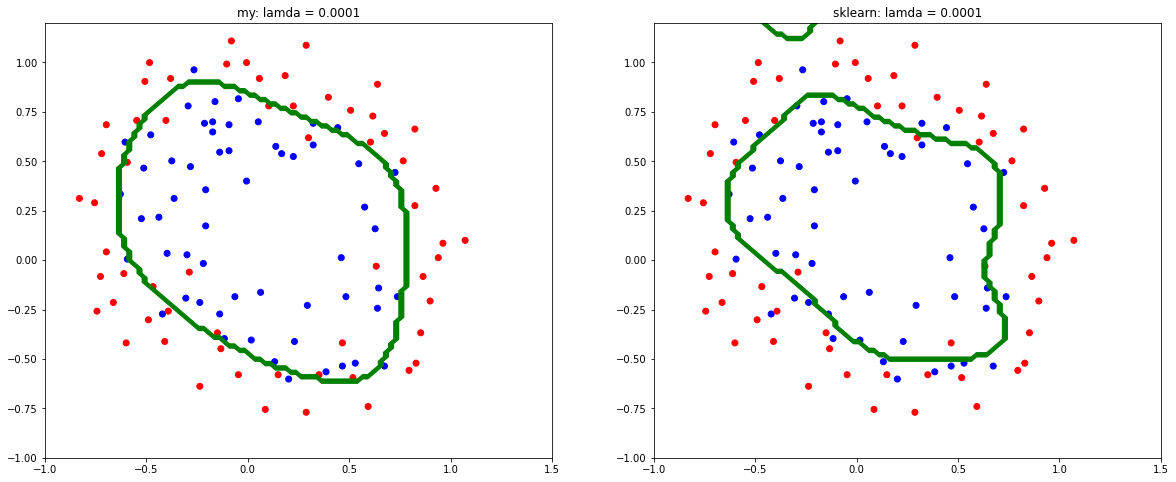

D:\anaconda\envs\piptorch\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


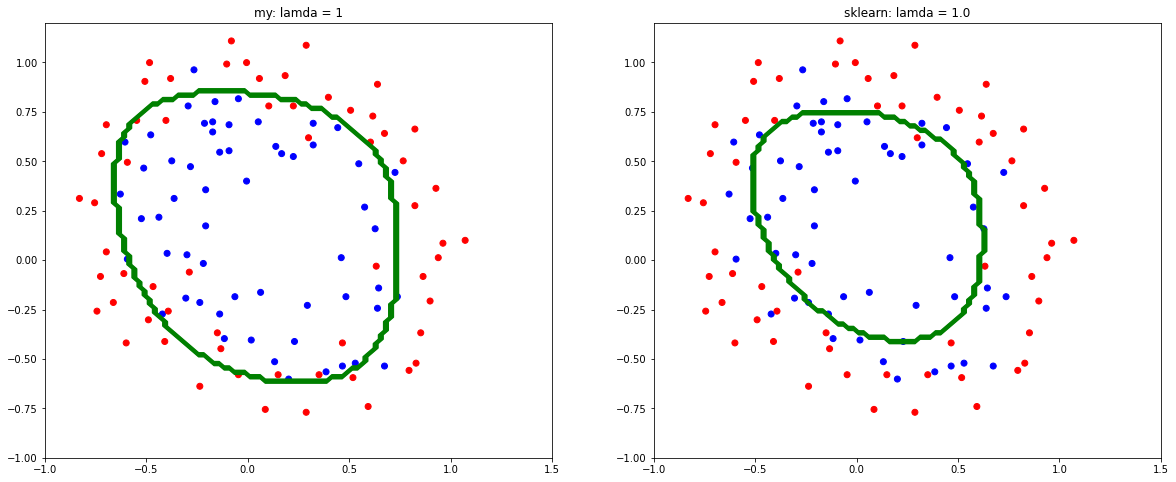

D:\anaconda\envs\piptorch\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


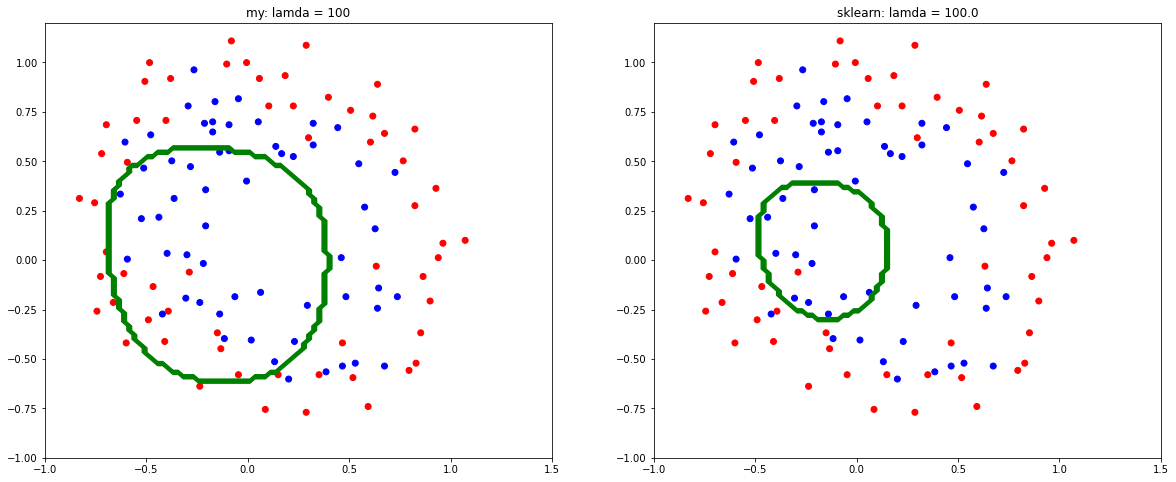

In [ ]:


for i in [0.0001,1,100]:
    fig, axs = plt.subplots(1,2,figsize=(20,8))

    w = train_reg(X2,Y2,step=0.01,iter=1e6,threshold=1e-8,e=1e-8,lamda=i,loss_plot=False)
    drawmesh_reg([-1,1.5],[-1,1.2],w,X2,Y2,title=f"my: lamda = {i}",subplot=axs[0])
    sk_mesh([-1,1.5],[-1,1.2],X2,Y2,c=i**(-1),subplot=axs[1])
    plt.show()


